# Analysis for Section 5.1 (ctd.): CST w/o vs CST w/

In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# src files
from situation_testing.situation_testing import SituationTesting
# plot params
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=11)
plt.rc('legend', fontsize=11)
plt.rc('lines', linewidth=2)
plt.rc('axes', linewidth=2)
plt.rc('axes', edgecolor='k')
plt.rc('xtick.major', width=2)
plt.rc('xtick.major', size=6)
plt.rc('ytick.major', width=2)
plt.rc('ytick.major', size=6)
plt.rc('pdf', fonttype=42)
plt.rc('ps', fonttype=42)

In [2]:
# working directory
wd = os.path.dirname(os.getcwd())
# relevant folders
data_path = os.path.abspath(os.path.join(wd, 'data')) + '\\'
resu_path = os.path.abspath(os.path.join(wd, 'results')) + '\\'

In [3]:
# factual dataset
org_df    = pd.read_csv(data_path + 'LoanApplication_v2.csv', sep='|', )
# counterfactual dataset
org_cf_df = pd.read_csv(data_path + 'counterfactuals\\cf_LoanApplication_v2.csv', sep='|', )

## The summary stats

From the two tables below, as well as the two figures, it is clear that the complainants' counterfactuals are "representative" of the males in $\mathcal{D}$. What is interesting is that said dataset is considerably imbalanced. It is still unclear to me why the centers are this crucial between CST w/ and CST w/o.

In [4]:
org_df[['AnnualSalary', 'AccountBalance', 'Gender']].groupby('Gender').describe().round(2)

AnnualSalary                                                            \
              count       mean       std     min      25%       50%       75%   
Gender                                                                          
0            3281.0  100655.29  32509.34     0.0  80000.0  100000.0  120000.0   
1            1712.0   84858.94  31634.45  5000.0  62000.0   83500.0  106500.0   

                 AccountBalance                                         \
             max          count      mean       std      min       25%   
Gender                                                                   
0       270000.0         3281.0  30207.08  10049.34  1851.66  23155.54   
1       201000.0         1712.0  24302.71   9789.64   498.02  17453.30   

                                      
             50%       75%       max  
Gender                                
0       29621.16  36932.95  76890.36  
1       23786.97  30923.07  59268.50

In [5]:
org_cf_df[['AnnualSalary', 'AccountBalance', 'Gender']].groupby('Gender').describe().round(2)

AnnualSalary                                                      \
              count       mean       std       min       25%        50%   
Gender                                                                    
0            3281.0  100655.29  32509.34     -0.00  80000.00  100000.00   
1            1712.0  100655.29  31634.45  20796.35  77796.35   99296.35   

                             AccountBalance                               \
              75%        max          count      mean       std      min   
Gender                                                                     
0       120000.00  270000.00         3281.0  30207.08  10049.34  1851.66   
1       122296.35  216796.35         1712.0  30207.08   9789.64  6402.39   

                                                
             25%       50%       75%       max  
Gender                                          
0       23155.54  29621.16  36932.95  76890.35  
1       23357.68  29691.34  36827.45  65172.87

Text(0.5, 0, 'Annual salary ($X1$)')

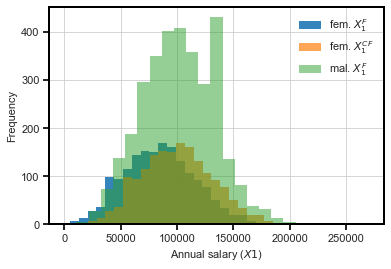

In [6]:
# distributions for X1
b = 25
plt.hist(org_df[org_df['Gender'] == 1]['AnnualSalary'], bins=b, alpha=0.9, label=r'fem. $X_1^F$')
plt.hist(org_cf_df[org_cf_df['Gender'] == 1]['AnnualSalary'], bins=b, alpha=0.7, label=r'fem. $X_1^{CF}$')
plt.hist(org_df[org_df['Gender'] == 0]['AnnualSalary'], bins=b, alpha=0.5, label=r'mal. $X_1^F$')
plt.legend(loc='upper right')
plt.ylabel('Frequency')
plt.xlabel(r'Annual salary ($X1$)')

Text(0.5, 0, 'Account balance ($X_2$) for females')

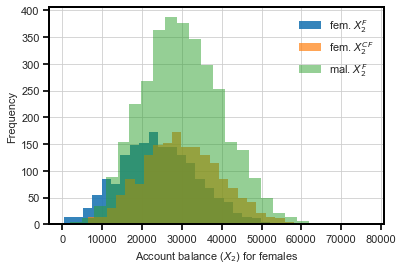

In [7]:
# distributions X2
b = 25
plt.hist(org_df[org_df['Gender'] == 1]['AccountBalance'], bins=b, alpha=0.9, label=r'fem. $X_2^F$')
plt.hist(org_cf_df[org_cf_df['Gender'] == 1]['AccountBalance'], bins=b, alpha=0.7, label=r'fem. $X_2^{CF}$')
plt.hist(org_df[org_df['Gender'] == 0]['AccountBalance'], bins=b, alpha=0.5, label=r'mal. $X_2^F$')
plt.legend(loc='upper right')
plt.ylabel('Frequency')
plt.xlabel(r'Account balance ($X_2$) for females')

## Regarding k=15 results, $\tau=0.0$

In [17]:
res_df = org_df[['Gender', 'LoanApproval']].copy()
res_df['cf_LoanApproval'] = org_cf_df['LoanApproval'].copy()

In [11]:
# ### attribute-specific params
# feat_trgt = 'LoanApproval'
# feat_trgt_vals = {'positive': 1, 'negative': -1}
# # list of relevant features
# feat_rlvt = ['AnnualSalary', 'AccountBalance']
# # protected feature
# feat_prot = 'Gender'
# # values for the protected feature: use 'non_protected' and 'protected' accordingly
# feat_prot_vals = {'non_protected': 0, 'protected': 1}

### st-specific params
# size of neighborhoods
n = 15
# significance level
alpha = 0.05
# tau diviation
tau = 0.0

In [30]:
print("For k=", n)

test_df    = org_df.copy()
test_cf_df = org_cf_df.copy()

cst = SituationTesting()
cst.setup_baseline(test_df, test_cf_df, nominal_atts=['Gender'], continuous_atts=['AnnualSalary', 'AccountBalance'])

print("CST w/o")
res_df['CSTwo'] = cst.run(target_att='LoanApproval', target_val={'positive': 1, 'negative': -1},
                          sensitive_att='Gender', sensitive_val={'non_protected': 0, 'protected': 1},
                          include_centers=False, 
                          k=n, alpha=alpha, tau=tau)
# num. cases
print(res_df[res_df['CSTwo'] > tau].shape[0])
# get neighnorhoods
cst_wo_knns = cst.res_dict_df_neighbors
# disc stats
cst_wo_stts = cst.get_test_discrimination()
# num. cases (stat sig)
print(cst_wo_stts[(cst_wo_stts['DiscEvi'] == 'Yes') & (cst_wo_stts['StatEvi'] == 'Yes')].shape[0])

print("CST wi/")
res_df['CSTwi'] = cst.run(target_att='LoanApproval', target_val={'positive': 1, 'negative': -1},
                          sensitive_att='Gender', sensitive_val={'non_protected': 0, 'protected': 1},
                          include_centers=True,
                          k=n, alpha=alpha, tau=tau)
# num. cases
print(res_df[res_df['CSTwi'] > tau].shape[0])
# get neighnorhoods
cst_wi_knns = cst.res_dict_df_neighbors
# disc stats
cst_wi_stts = cst.get_test_discrimination()
# num. cases (stat sig)
print(cst_wi_stts[(cst_wi_stts['DiscEvi'] == 'Yes') & (cst_wi_stts['StatEvi'] == 'Yes')].shape[0])

print("=== DONE ===")

For k= 15
CST w/o
288
272
CST wi/
420
272
=== DONE ===


In [31]:
# Set1: c is in CST w/o and w/
set1 = res_df[(res_df['CSTwo'] > tau) & (res_df['CSTwi'] > tau)].index.to_list()

# check
print('All CST w/o cases in CST w/?')
if res_df[res_df['CSTwo'] > tau].shape[0] == len(set1):
    print('Yes')
else:
    print('No')

# Set2: c is in CST w/ but not in CST w/o
set2 = [c for c in res_df[(res_df['CSTwi'] > tau)].index.to_list() if c not in set1]
print(len(set2), "are only in CST w/")

# check
print((len(set1) + len(set2)) == res_df[res_df['CSTwi'] > tau].shape[0])

All CST w/o cases in CST w/?
Yes
132 are only in CST w/
True


In [34]:
# c's in CST w/o and w/ THAT ARE STATISTICALLY SIGNIFICANT
temp_s1 = cst_wi_stts[(cst_wi_stts['DiscEvi'] == 'Yes') & (cst_wi_stts['StatEvi'] == 'Yes')]['individual'].to_list()
temp_s2 = cst_wo_stts[(cst_wo_stts['DiscEvi'] == 'Yes') & (cst_wo_stts['StatEvi'] == 'Yes')]['individual'].to_list()
temp_s3 = [c for c in temp_s1 if c in temp_s2]
# Are these the same for both CST versions?
print(len(temp_s1) == len(temp_s3))

True


In [39]:
set1[0]

5

In [40]:
c=5
var = ['AnnualSalary', 'AccountBalance', 'LoanApproval']

temp_ctr_wo = org_df.iloc[cst_wo_knns[c]['ctr_idx'], :][var]
temp_tst_wo = org_cf_df.iloc[cst_wo_knns[c]['tst_idx'], :][var]
    
temp_ctr_wi = org_df.iloc[cst_wi_knns[c]['ctr_idx'], :][var]
temp_tst_wi = org_cf_df.iloc[cst_wi_knns[c]['tst_idx'], :][var]

In [51]:
temp_ctr_wo

,AnnualSalary,AccountBalance,LoanApproval
751,102000,26979.648527,1.0
4517,102000,27009.971951,1.0
3798,105000,26074.552208,1.0
4072,103500,25276.968833,1.0
3223,100000,25393.640169,1.0
2118,104500,26522.336677,1.0
2327,98000,26163.832986,1.0
4211,98000,25787.638559,1.0
2926,102500,24640.907892,1.0
4750,106500,25854.213046,1.0


In [52]:
temp_ctr_wi

,AnnualSalary,AccountBalance,LoanApproval
751,102000,26979.648527,1.0
4517,102000,27009.971951,1.0
3798,105000,26074.552208,1.0
4072,103500,25276.968833,1.0
3223,100000,25393.640169,1.0
2118,104500,26522.336677,1.0
2327,98000,26163.832986,1.0
4211,98000,25787.638559,1.0
2926,102500,24640.907892,1.0
4750,106500,25854.213046,1.0


In [49]:
org_df.iloc[c]

LoanApproval           1.000000
AnnualSalary      102000.000000
AccountBalance     26000.811689
u1                120000.000000
u2                 -3172.991276
Gender                 1.000000
Name: 5, dtype: float64

In [50]:
org_cf_df.iloc[c]

LoanApproval           1.00
AnnualSalary      117796.35
AccountBalance     31905.19
Gender                 1.00
Name: 5, dtype: float64

In [35]:
# Summary stats for c's in both CST w/ and w/o (i.e., set1): let's look at both versions

print("For k=", n)

nsf = 2
list_temp_df = []
var = ['AnnualSalary', 'AccountBalance', 'LoanApproval']

for c in set1:
    
    temp_df = {}
    
    temp_ctr_wo = org_df.iloc[cst_wo_knns[c]['ctr_idx'], :][var]
    temp_tst_wo = org_cf_df.iloc[cst_wo_knns[c]['tst_idx'], :][var]
    
    temp_ctr_wi = org_df.iloc[cst_wi_knns[c]['ctr_idx'], :][var]
    temp_tst_wi = org_cf_df.iloc[cst_wi_knns[c]['tst_idx'], :][var]
        
    temp_df['id'] = c
    # num. of negative decisions
    temp_df['neg_y_ctr_wo'] = temp_ctr_wo[temp_ctr_wo['LoanApproval'] == -1].shape[0]
    temp_df['neg_y_tst_wo'] = temp_tst_wo[temp_tst_wo['LoanApproval'] == -1].shape[0]
    temp_df['neg_y_ctr_wi'] = temp_ctr_wi[temp_ctr_wi['LoanApproval'] == -1].shape[0]
    temp_df['neg_y_tst_wi'] = temp_tst_wi[temp_tst_wi['LoanApproval'] == -1].shape[0]
    # prp. of negative decisions
    temp_df['p_ctr_wo'] = round(temp_df['neg_y_ctr_wo'] / n, nsf)
    temp_df['p_tst_wo'] = round(temp_df['neg_y_tst_wo'] / n, nsf)
    temp_df['p_ctr_wi'] = round(temp_df['neg_y_ctr_wi'] / n, nsf)
    temp_df['p_tst_wi'] = round(temp_df['neg_y_tst_wi'] / n, nsf)
            
#     temp_df['avg_d_ctr']    = round(sum(stST_dis[c]['ctr_idx']) / len(stST_dis[c]['ctr_idx']), nsf)
#     temp_df['avg_d_tst_st'] = round(sum(stST_dis[c]['tst_idx']) / len(stST_dis[c]['tst_idx']), nsf)
#     temp_df['avg_d_tst_cf'] = round(sum(cfST_dis[c]['tst_idx']) / len(cfST_dis[c]['tst_idx']), nsf)
    
    for v in ['AnnualSalary', 'AccountBalance']:
        temp_df['avg_ctr_wo_' + v] = round(temp_ctr_wo.mean()[v], nsf)
        temp_df['std_ctr_wo_' + v] = round(temp_ctr_wo.std()[v], nsf)
        temp_df['avg_tst_wo_' + v] = round(temp_tst_wo.mean()[v], nsf)
        temp_df['std_tst_wo_' + v] = round(temp_tst_wo.std()[v], nsf)
        
        temp_df['avg_ctr_wi_' + v] = round(temp_ctr_wi.mean()[v], nsf)
        temp_df['std_ctr_wi_' + v] = round(temp_ctr_wi.std()[v], nsf)
        temp_df['avg_tst_wi_' + v] = round(temp_tst_wi.mean()[v], nsf)
        temp_df['std_tst_wi_' + v] = round(temp_tst_wi.std()[v], nsf)
        
    list_temp_df.append(temp_df)

set1_summary_stats = pd.DataFrame(list_temp_df)

set1_summary_stats.head(5)

For k= 15


,id,neg_y_ctr_wo,neg_y_tst_wo,neg_y_ctr_wi,neg_y_tst_wi,p_ctr_wo,p_tst_wo,p_ctr_wi,p_tst_wi,avg_ctr_wo_AnnualSalary,...,avg_tst_wi_AnnualSalary,std_tst_wi_AnnualSalary,avg_ctr_wo_AccountBalance,std_ctr_wo_AccountBalance,avg_tst_wo_AccountBalance,std_tst_wo_AccountBalance,avg_ctr_wi_AccountBalance,std_ctr_wi_AccountBalance,avg_tst_wi_AccountBalance,std_tst_wi_AccountBalance
0,5,1,0,1,0,0.07,0.00,0.07,0.00,101866.67,...,110000.00,0.00,26179.17,896.82,29959.04,211.08,26179.17,896.82,29959.04,211.08
1,9,15,14,15,14,1.00,0.93,1.00,0.93,83500.00,...,91333.33,3518.66,21184.53,582.35,25060.94,92.93,21184.53,582.35,25060.94,92.93
2,44,15,0,15,0,1.00,0.00,1.00,0.00,88800.00,...,100000.00,0.00,26136.55,401.03,30049.62,70.98,26136.55,401.03,30049.62,70.98
3,50,15,0,15,0,1.00,0.00,1.00,0.00,89833.33,...,100000.00,0.00,23323.32,500.22,27130.95,125.06,23323.32,500.22,27130.95,125.06
4,55,12,0,12,0,0.80,0.00,0.80,0.00,93500.00,...,100000.00,0.00,25779.09,580.91,29655.55,50.06,25779.09,580.91,29655.55,50.06


In [36]:
set1_summary_stats.mean().round(2)

id                            2528.21
neg_y_ctr_wo                    12.80
neg_y_tst_wo                     0.63
neg_y_ctr_wi                    12.80
neg_y_tst_wi                     0.63
p_ctr_wo                         0.85
p_tst_wo                         0.04
p_ctr_wi                         0.85
p_tst_wi                         0.04
avg_ctr_wo_AnnualSalary      87867.82
std_ctr_wo_AnnualSalary       1547.62
avg_tst_wo_AnnualSalary      98745.37
std_tst_wo_AnnualSalary        371.41
avg_ctr_wi_AnnualSalary      87867.82
std_ctr_wi_AnnualSalary       1547.62
avg_tst_wi_AnnualSalary      98745.37
std_tst_wi_AnnualSalary        371.41
avg_ctr_wo_AccountBalance    24993.61
std_ctr_wo_AccountBalance      496.69
avg_tst_wo_AccountBalance    28956.73
std_tst_wo_AccountBalance      191.06
avg_ctr_wi_AccountBalance    24993.61
std_ctr_wi_AccountBalance      496.69
avg_tst_wi_AccountBalance    28956.73
std_tst_wi_AccountBalance      191.06
dtype: float64

In [37]:
# Summary stats for c's in only CST w/ (i.e., set2): let's look at both versions

print("For k=", n)

nsf = 2
list_temp_df = []
var = ['AnnualSalary', 'AccountBalance', 'LoanApproval']

for c in set2:
    
    temp_df = {}
    
    temp_ctr_wo = org_df.iloc[cst_wo_knns[c]['ctr_idx'], :][var]
    temp_tst_wo = org_cf_df.iloc[cst_wo_knns[c]['tst_idx'], :][var]
    
    temp_ctr_wi = org_df.iloc[cst_wi_knns[c]['ctr_idx'], :][var]
    temp_tst_wi = org_cf_df.iloc[cst_wi_knns[c]['tst_idx'], :][var]
        
    temp_df['id'] = c
    # num. of negative decisions
    temp_df['neg_y_ctr_wo'] = temp_ctr_wo[temp_ctr_wo['LoanApproval'] == -1].shape[0]
    temp_df['neg_y_tst_wo'] = temp_tst_wo[temp_tst_wo['LoanApproval'] == -1].shape[0]
    temp_df['neg_y_ctr_wi'] = temp_ctr_wi[temp_ctr_wi['LoanApproval'] == -1].shape[0]
    temp_df['neg_y_tst_wi'] = temp_tst_wi[temp_tst_wi['LoanApproval'] == -1].shape[0]
    # prp. of negative decisions
    temp_df['p_ctr_wo'] = round(temp_df['neg_y_ctr_wo'] / n, nsf)
    temp_df['p_tst_wo'] = round(temp_df['neg_y_tst_wo'] / n, nsf)
    temp_df['p_ctr_wi'] = round(temp_df['neg_y_ctr_wi'] / n, nsf)
    temp_df['p_tst_wi'] = round(temp_df['neg_y_tst_wi'] / n, nsf)
            
#     temp_df['avg_d_ctr']    = round(sum(stST_dis[c]['ctr_idx']) / len(stST_dis[c]['ctr_idx']), nsf)
#     temp_df['avg_d_tst_st'] = round(sum(stST_dis[c]['tst_idx']) / len(stST_dis[c]['tst_idx']), nsf)
#     temp_df['avg_d_tst_cf'] = round(sum(cfST_dis[c]['tst_idx']) / len(cfST_dis[c]['tst_idx']), nsf)
    
    for v in ['AnnualSalary', 'AccountBalance']:
        temp_df['avg_ctr_wo_' + v] = round(temp_ctr_wo.mean()[v], nsf)
        temp_df['std_ctr_wo_' + v] = round(temp_ctr_wo.std()[v], nsf)
        temp_df['avg_tst_wo_' + v] = round(temp_tst_wo.mean()[v], nsf)
        temp_df['std_tst_wo_' + v] = round(temp_tst_wo.std()[v], nsf)
        
        temp_df['avg_ctr_wi_' + v] = round(temp_ctr_wi.mean()[v], nsf)
        temp_df['std_ctr_wi_' + v] = round(temp_ctr_wi.std()[v], nsf)
        temp_df['avg_tst_wi_' + v] = round(temp_tst_wi.mean()[v], nsf)
        temp_df['std_tst_wi_' + v] = round(temp_tst_wi.std()[v], nsf)
        
    list_temp_df.append(temp_df)

set2_summary_stats = pd.DataFrame(list_temp_df)

set2_summary_stats.head(5)

For k= 15


,id,neg_y_ctr_wo,neg_y_tst_wo,neg_y_ctr_wi,neg_y_tst_wi,p_ctr_wo,p_tst_wo,p_ctr_wi,p_tst_wi,avg_ctr_wo_AnnualSalary,...,avg_tst_wi_AnnualSalary,std_tst_wi_AnnualSalary,avg_ctr_wo_AccountBalance,std_ctr_wo_AccountBalance,avg_tst_wo_AccountBalance,std_tst_wo_AccountBalance,avg_ctr_wi_AccountBalance,std_ctr_wi_AccountBalance,avg_tst_wi_AccountBalance,std_tst_wi_AccountBalance
0,47,15,15,15,15,1.0,1.0,1.0,1.0,76500.00,...,90000.0,0.0,21503.50,316.90,25141.70,98.41,21503.50,316.90,25141.70,98.41
1,150,15,15,15,15,1.0,1.0,1.0,1.0,77300.00,...,90000.0,0.0,21315.15,367.58,25089.14,110.49,21315.15,367.58,25089.14,110.49
2,169,15,15,15,15,1.0,1.0,1.0,1.0,80200.00,...,90000.0,0.0,21422.63,504.28,25299.08,90.35,21422.63,504.28,25299.08,90.35
3,177,15,15,15,15,1.0,1.0,1.0,1.0,80166.67,...,90000.0,0.0,20758.09,370.82,24378.08,127.52,20758.09,370.82,24378.08,127.52
4,214,15,15,15,15,1.0,1.0,1.0,1.0,81700.00,...,90000.0,0.0,22458.64,406.77,25997.00,113.16,22458.64,406.77,25997.00,113.16


In [38]:
set2_summary_stats.mean().round(2)

id                            2383.83
neg_y_ctr_wo                    15.00
neg_y_tst_wo                    15.00
neg_y_ctr_wi                    15.00
neg_y_tst_wi                    15.00
p_ctr_wo                         1.00
p_tst_wo                         1.00
p_ctr_wi                         1.00
p_tst_wi                         1.00
avg_ctr_wo_AnnualSalary      76471.97
std_ctr_wo_AnnualSalary       1301.68
avg_tst_wo_AnnualSalary      87080.81
std_tst_wo_AnnualSalary        489.98
avg_ctr_wi_AnnualSalary      76471.97
std_ctr_wi_AnnualSalary       1301.68
avg_tst_wi_AnnualSalary      87080.81
std_tst_wi_AnnualSalary        489.98
avg_ctr_wo_AccountBalance    22088.48
std_ctr_wo_AccountBalance      408.55
avg_tst_wo_AccountBalance    25891.52
std_tst_wo_AccountBalance      124.86
avg_ctr_wi_AccountBalance    22088.48
std_ctr_wi_AccountBalance      408.55
avg_tst_wi_AccountBalance    25891.52
std_tst_wi_AccountBalance      124.86
dtype: float64

In [25]:
cst_wo_stts

,individual,p_c,p_t,org_diff,d_alpha,diff,CIs,DiscEvi,StatEvi
0,0,1.000000,1.000000,0.000,0.000000,0.0,"[0.0, 0.0]",No,No
1,4,0.000000,0.000000,0.000,0.000000,0.0,"[0.0, 0.0]",No,No
2,5,0.066667,0.000000,0.067,0.105948,0.0,"[-0.039, 0.173]",Yes,No
3,6,1.000000,1.000000,0.000,0.000000,0.0,"[0.0, 0.0]",No,No
4,9,1.000000,0.933333,0.067,0.105948,0.0,"[-0.039, 0.173]",Yes,No
...,...,...,...,...,...,...,...,...,...
1707,4982,1.000000,1.000000,0.000,0.000000,0.0,"[0.0, 0.0]",No,No
1708,4985,1.000000,1.000000,0.000,0.000000,0.0,"[0.0, 0.0]",No,No
1709,4987,0.000000,0.000000,0.000,0.000000,0.0,"[0.0, 0.0]",No,No
1710,4989,0.000000,0.000000,0.000,0.000000,0.0,"[0.0, 0.0]",No,No


In [22]:
288+132

420

## The impact of $|k|$, given $\tau$

## The impact of $|\tau|$, given $K$

In [ ]:
### st-specific params
# size of neighborhoods
n = 15
# significance level
alpha = 0.05
# tau diviation
tau = 0.0